<a href="https://colab.research.google.com/github/RakibOFC/Apriori-Algorithm-from-scratch-in-python/blob/main/Apriori_Algorithm_from_scratch_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apriori Algorithm from Scratch in `Python`

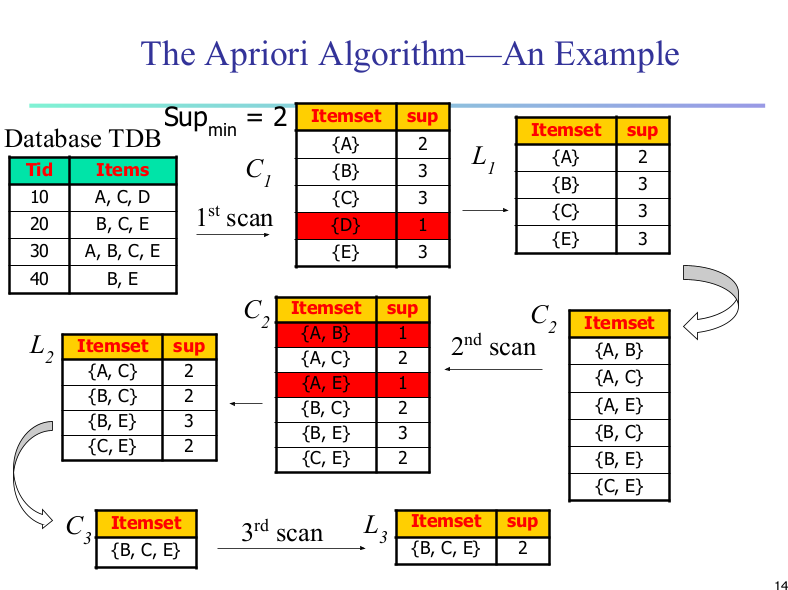

## Import `python` necessary libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:

df = pd.read_csv("/content/drive/MyDrive/CSE Class Info/DM Lab/Datasets/database_tbd.csv")

In [3]:
df.head()

,Tid,Items
0,10,"A, C, D"
1,20,"B, C, E"
2,30,"A, B, C, E"
3,40,"B, E"


### Minimum support count = `2`

In [4]:
min_support_count = 2

### Define `str_to_list` function to convert string to list (remove `comma` (`,`) and `space` (` `))

In [5]:
def str_to_list(str_row):

  temp_list =  []
  for j in list(str_row):
    if j != "," and j != " ":
      temp_list.append(j)

  return temp_list

### Dataset to get unique items (`set`)

In [6]:
# Create an empty list - item_list
item_list = []

# Iterate all item from the dataset["Items"]
for i in df["Items"]:
  for j in str_to_list(i):
    if j not in item_list:
      item_list.append(j)

# List to convert sorted set for get unique items
temp_item_set = sorted(set(item_list))
df_item_set = []

# Convert every element is a set
for i in temp_item_set:
  df_item_set.append(set(i))

print(f"Dataset unique items: {df_item_set}")

Dataset unique items: [{'A'}, {'B'}, {'C'}, {'D'}, {'E'}]


### Define `createTwoColDf` function to create two column dataframe i.e. `itemset` and `sup` (number of items)



In [7]:
def createTwoColDf(one_col_df, scan_no):
  # Initialize data_list
  data_list = []

  for setA in one_col_df["itemset"]:
    subsetCount = 0

    for j in df["Items"]:
      setB = set(str_to_list(j))

      if setA.issubset(setB):
        subsetCount += 1;
    
    # Append to data list
    data_list.append([setA, subsetCount])
    
  # Create new datafrane using data_list values
  two_col_df = pd.DataFrame(data_list, columns=['itemset', 'sup'])

  # Display two column df
  display(two_col_df)

  print(f"\nL = {scan_no}; (Minimum support count): {min_support_count}\n")

  # Remove row, if sup value is less then min_support_cout
  two_col_df.drop(two_col_df[two_col_df['sup'] < min_support_count].index, inplace = True)

  return two_col_df

### Define `createOneColDf` function to create one column dataframe i.e. `itemset`

In [8]:
def createOneColDf(param_list):

  one_col_df = pd.DataFrame(columns=['itemset'])

  for row in param_list:
    one_col_df = one_col_df.append({'itemset': set(row)}, ignore_index=True)

  return one_col_df

### Define `checkDfForNewScan` function to check dataframe for new scan.

In [9]:
def checkDfForNewScan(two_col_df, scan_no):
  
  # Create empty temp_list
  temp_list = []

  for i in two_col_df["itemset"]:
    for j in two_col_df["itemset"]:
      if i != j:
        if len(i.union(j)) >= (scan_no):
          return True

  return False

In [10]:
main_one_col_df = createOneColDf(df_item_set)
main_one_col_df

,itemset
0,{A}
1,{B}
2,{C}
3,{D}
4,{E}


In [11]:
scan_no = 1

while(True):

  print(f"\nScan = {scan_no}, C = {scan_no}\n")

  two_col_df = createTwoColDf(main_one_col_df, scan_no)

  if not checkDfForNewScan(main_one_col_df, scan_no):
    print(f"No more item available for scan {scan_no}!")
    break

  # Display two column dataframe
  display(two_col_df)

  # Create empty temp_list
  temp_list = []

  for i in two_col_df["itemset"]:
    for j in two_col_df["itemset"]:
      if i != j:
        if len(i.union(j)) <= (scan_no + 1):
          temp_list.append(sorted(i.union(j)))

  # Remove duplicate list item
  new_list = []

  for i in temp_list:
    if i not in new_list:
      new_list.append(i)

  main_one_col_df = createOneColDf(new_list)
  
  display(main_one_col_df)
  scan_no += 1


Scan = 1, C = 1



,itemset,sup
0,{A},2
1,{B},3
2,{C},3
3,{D},1
4,{E},3



L = 1; (Minimum support count): 2



,itemset,sup
0,{A},2
1,{B},3
2,{C},3
4,{E},3


,itemset
0,"{B, A}"
1,"{C, A}"
2,"{A, E}"
3,"{C, B}"
4,"{B, E}"
5,"{C, E}"



Scan = 2, C = 2



,itemset,sup
0,"{B, A}",1
1,"{C, A}",2
2,"{A, E}",1
3,"{C, B}",2
4,"{B, E}",3
5,"{C, E}",2



L = 2; (Minimum support count): 2



,itemset,sup
1,"{C, A}",2
3,"{C, B}",2
4,"{B, E}",3
5,"{C, E}",2


,itemset
0,"{C, B, A}"
1,"{C, A, E}"
2,"{C, B, E}"



Scan = 3, C = 3



,itemset,sup
0,"{C, B, A}",1
1,"{C, A, E}",1
2,"{C, B, E}",2



L = 3; (Minimum support count): 2



,itemset,sup
2,"{C, B, E}",2


,itemset



Scan = 4, C = 4



,itemset,sup



L = 4; (Minimum support count): 2

No more item available for scan 4!
